In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


%matplotlib inline

In [3]:
df_stroke = pd.read_csv('DATA/stroke_train_2v.csv')

In [4]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df_stroke.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [6]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
df_stroke.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [8]:
# Might revisit this
# I chose to replace NaN values with 'never smoked', assuming a non-answer means 'No'

df_stroke['smoking_status'].fillna('never smoked', inplace=True)
df_stroke = df_stroke.dropna()

In [9]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [10]:
df_stroke = df_stroke.drop(df_stroke[(df_stroke.gender == 'Other')].index)

In [11]:
df_stroke = df_stroke.dropna()

In [12]:
df_nostroke = df_stroke[df_stroke.stroke == 0]
df_yesstroke = df_stroke[df_stroke.stroke == 1]

In [13]:
df_nostroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,41288.000000,41288.000000,41288.000000,41288.000000,41288.000000,41288.000000,41288.0
mean,36812.180246,41.426883,0.084722,0.040302,103.226858,28.585487,0.0
std,20920.188515,22.358410,0.278471,0.196670,41.761111,7.788765,0.0
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.0
25%,18751.500000,23.000000,0.000000,0.000000,77.320000,23.200000,0.0
50%,37001.500000,43.000000,0.000000,0.000000,91.210000,27.700000,0.0
75%,54858.500000,59.000000,0.000000,0.000000,111.080000,32.800000,0.0
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,0.0


In [14]:
df_yesstroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.0
mean,37097.724728,68.457232,0.267496,0.223950,129.767823,29.868118,1.0
std,20739.924118,12.164089,0.442998,0.417214,60.306648,6.344873,0.0
min,80.000000,14.000000,0.000000,0.000000,55.010000,14.300000,1.0
25%,20194.000000,60.000000,0.000000,0.000000,80.695000,25.700000,1.0
50%,36519.000000,72.000000,0.000000,0.000000,104.510000,29.100000,1.0
75%,54989.500000,79.000000,1.000000,0.000000,193.720000,33.000000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


#### The means for the stroke patients are all higher across the board

(array([1560., 1278., 1027.,  980.,  807., 1307., 1420., 1015., 1486.,
        1525., 1594., 1098., 1499., 1688., 1688., 1136., 1926., 1931.,
        1384., 1993., 1950., 1772., 1148., 1587., 1358., 1205.,  693.,
         939., 1560., 1377.]),
 array([8.00000000e-02, 2.81066667e+00, 5.54133333e+00, 8.27200000e+00,
        1.10026667e+01, 1.37333333e+01, 1.64640000e+01, 1.91946667e+01,
        2.19253333e+01, 2.46560000e+01, 2.73866667e+01, 3.01173333e+01,
        3.28480000e+01, 3.55786667e+01, 3.83093333e+01, 4.10400000e+01,
        4.37706667e+01, 4.65013333e+01, 4.92320000e+01, 5.19626667e+01,
        5.46933333e+01, 5.74240000e+01, 6.01546667e+01, 6.28853333e+01,
        6.56160000e+01, 6.83466667e+01, 7.10773333e+01, 7.38080000e+01,
        7.65386667e+01, 7.92693333e+01, 8.20000000e+01]),
 <a list of 30 Patch objects>)

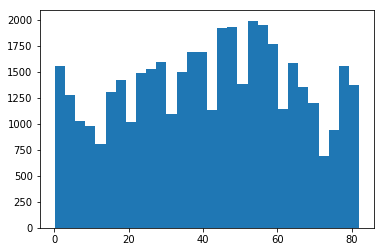

In [16]:
plt.hist(df_stroke.age, bins=30)

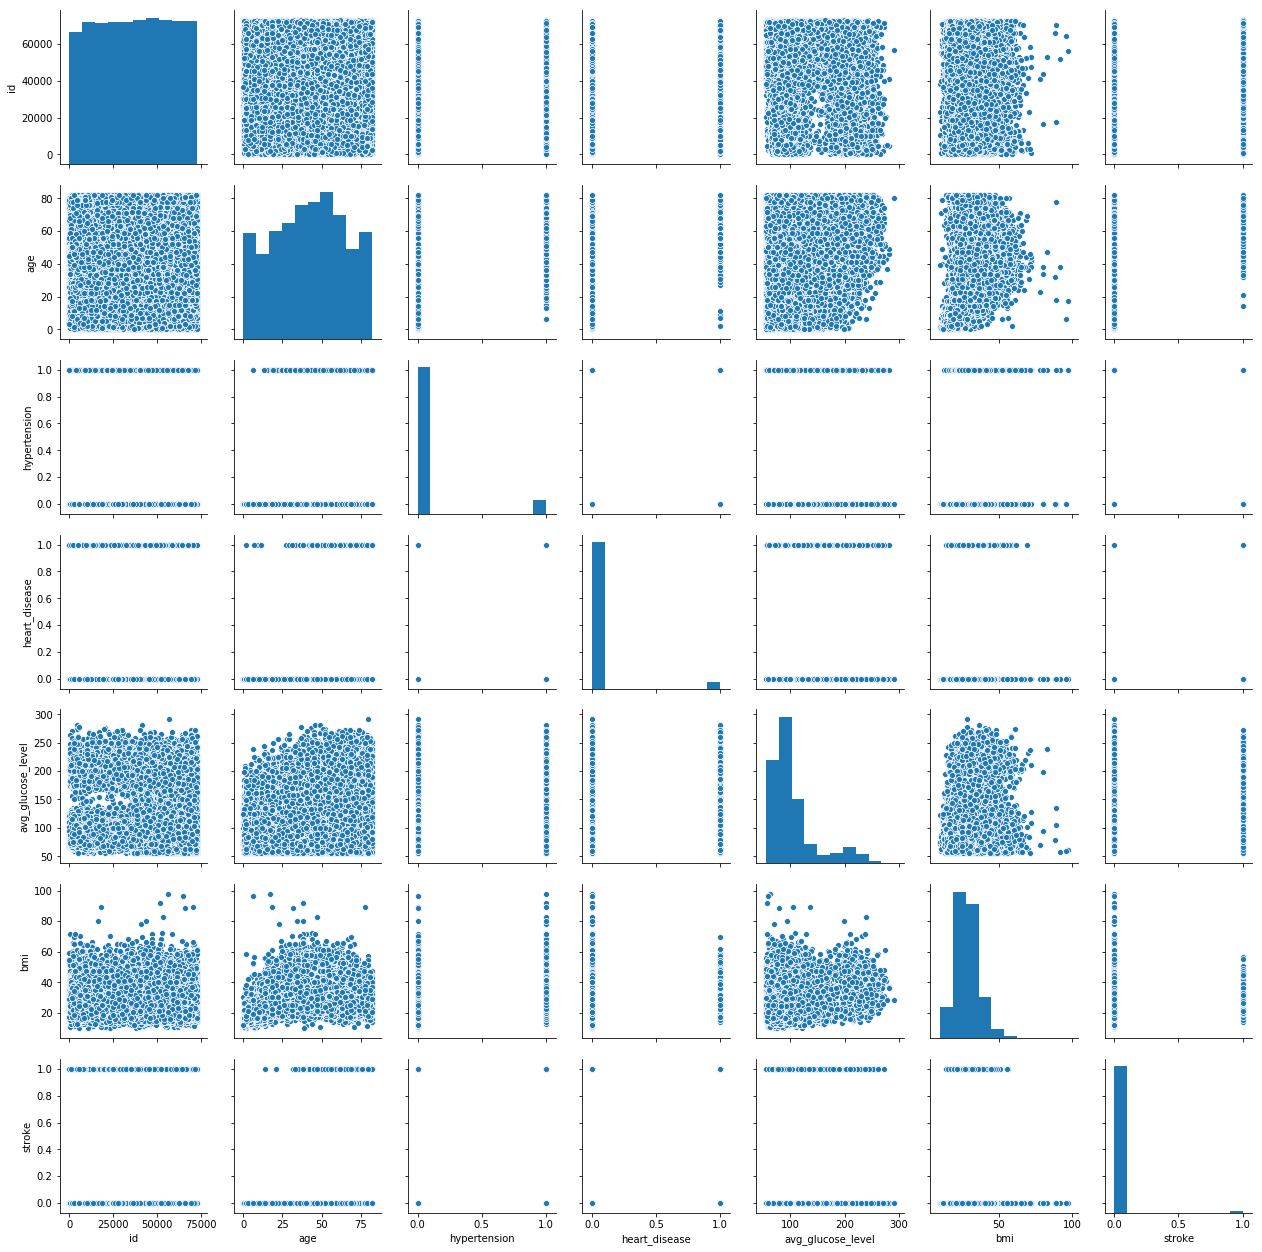

In [17]:
sns.pairplot(df_stroke)